# Ezra's Project

In [4]:
import os     
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy as sc
from scipy.stats import chi2_contingency
import bs4
from bs4 import BeautifulSoup
import requests
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
import re

In [5]:
from sklearn import preprocessing, linear_model, model_selection
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_union=pd.read_excel('union_table.xlsx')

In [7]:
df_union

,Unnamed: 0,super,catgory,product,suplier,sizes,price
0,0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,750 גרם,6.6
1,1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,750 גרם,14.9
2,2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,500 גרם,15.9
3,3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,500 גרם,14.8
4,4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,750 גרם,12.9
...,...,...,...,...,...,...,...
37413,37413,שופרסל,תוספי מזון,אוטריבייבי תרסיס לאף,אוטרימר,"15 מ""ל",24.9
37414,37414,שופרסל,תוספי מזון,אוטרימר תרסיס לאף,אוטרימר,"100 מ""ל",69.0
37415,37415,שופרסל,לספורטאים,קולגן בוסט קלאסי,אלטמן,30 אריזות אישיות,109.0
37416,37416,שופרסל,לספורטאים,היילופרו,נייצ'רס פרו,30 כמוסות,109.0


In [8]:
df_union.drop(["Unnamed: 0"],axis=1, inplace=True)

<b>נסתכל על הנתונים שבטבלה ונלמד מהם 

In [9]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37418 entries, 0 to 37417
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    37418 non-null  object 
 1   catgory  37374 non-null  object 
 2   product  37418 non-null  object 
 3   suplier  34162 non-null  object 
 4   sizes    34434 non-null  object 
 5   price    37418 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [10]:
df_union.super.value_counts() # כמות המוצרים לכל סופר לפני סידור הדאטה 

שופרסל      32772
וויקטורי     4646
Name: super, dtype: int64

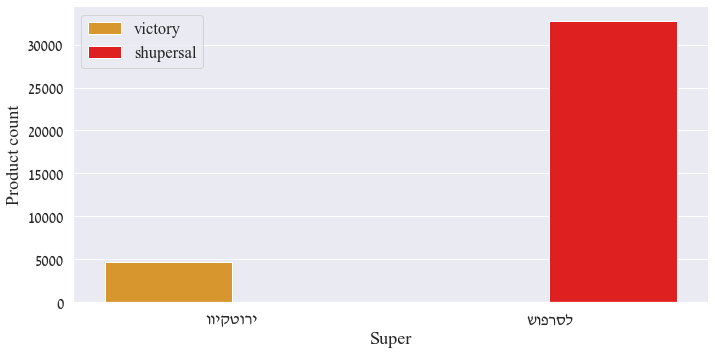

In [11]:
sns.set(font_scale = 1.5)
mpl.rcParams['font.family'] = 'david'
g = sns.catplot(
    x='super', 
    data=df_union,
    kind='count', 
    hue='super',
    palette=["#F39C12", "red"], 
    height=5, 
    aspect=2,
    legend=False,
    ).set_axis_labels('Super', 'Product count')
g.ax.legend(labels=['victory','shupersal'])

ניתן לראות בבירור שלשופרסל כמות מוצרים רבה יותר. 

In [12]:
df_union.describe(include="all")

,super,catgory,product,suplier,sizes,price
count,37418,37374,37418,34162,34434,37418.00000
unique,2,338,37324,2572,7475,NaN
top,שופרסל,טיפוח טבעי,פדים להסרת איפור בלונס,שופרסל,יח,NaN
freq,32772,1081,2,2300,1126,NaN
mean,NaN,NaN,NaN,NaN,NaN,215.82411
std,NaN,NaN,NaN,NaN,NaN,651.02749
min,NaN,NaN,NaN,NaN,NaN,1.00000
25%,NaN,NaN,NaN,NaN,NaN,13.90000
50%,NaN,NaN,NaN,NaN,NaN,29.90000
75%,NaN,NaN,NaN,NaN,NaN,119.00000


<b><u> :טיפול בכפילויות </b></u> 

לאחר שביצענו שלב זה עבור כל טבלה בנפרד נוודא שלא קיימים כפילויות נוספות 

In [13]:
df_union.duplicated().sum() # נקבל 0 כצפוי 

0

In [14]:
df_union['product'].duplicated().sum()

94

המשמעות היא שקיימים 94 מוצרים בלבד בעלי שם זהה בין וויקטורי ושופרסל. 
הדבר נובע ככל הנראה לאור העובדה שבשם המוצר עבור הטבלה של וויקטורי נכלל גם הספק 

<b><u> טיפול בערכים חסרים 

לאור העובדה שעבור פירות וירקות לדוגמא לא תמיד נקבל את שם הספק לא נרצה למחוק את השורות בהן ערכים חסרים. 

במקום זאת נמלא אותם באופן שמי שיבהיר לנו שהערך חסר. 

כמו כן את עמודת הגודל בכוונתי לחלק למס' עמודות: מס' יחידות, נפח/משקל ויחידת מידה. לאחר  שנבצע זאת נחזור לשלב זה עבור עמודות אלה.

כרגע נתמקד בעמודת הספק 

In [15]:
df_union.suplier=df_union.suplier.fillna("unknown")

In [16]:
df_union.suplier.nunique()

2573

In [17]:
for x in df_union.suplier.unique():
    print(x)

אנג'ל
ברמן
גרין לייט
דגנית עין בר
לחם הארץ
בונז'ור
אחדות
מאפיית אריאל
מאפיית ודש
מעדני תנעמי
פיתה אקספרס
אנרג'י
אסם
unknown
זן בר
מנה
נסטלה
ריל פודס
אבאל
מאסטר שף
וילי פוד
פתית
א.אדמה
חסלט
מרינה
שטראוס
פיצוחי חממה
שקדיה
ששון הקולה
דין שיווק
מימונס
קליית גת
לברלנד קראנץ'
מיה
טרה
יטבתה
משק צוריאל
תנובה
אוטלי
אלפרו
ויטריז
פרימונה
תנובה אלטרנטיב
סקי
גד
פיראוס
גאיה
ויולייף
בייבי בל
גוש חלב
גלבוע
השף הלבן
יורו
כפיר
נעם
עמק
ריץ'
הגבינות של נני
הנרי ויליך
מון בלאן
סוניון
נטו
זנטי
צבר
סיימן גבינות
החתול המחייך
לוואש קירי
נפוליאון
ארלה
סימפוניה
פילדלפיה
דנונה
מולר
יופלה
פרילי
גמדים
המחלבה
חלב הארץ
עדן קינוחים
יולו
מוו
מילקי
ספלנדיד
קרלו
באדי
אדום אדום
נחמיה לחוביץ
עטרה
שאטובריאן
מאסטרפוד
דלידג
קראון פיש
טעמי אסיה
זוגלובק
טירת צבי
יחיעם
מעדני הטלה
עוף ירושלים מהדרין
אלוויר
וליו
לורפק
פרזידנט
בלובנד
מזולה
שמרית
אחלה
זהבי
תבליני ביטון יוחאי
סבא חביב
עללחם
פסטה נונה
פסטה ריקו
ליב
מ. לסר
וגאנץ
טופוטי
כפרי בריא
משק ויילר
אחוה
מסדם
אל פסטור
גבינות הכפר
מחלבת המושבה
בלדי
אל גאוצ'ו
בלאק אנגוס
עוף טוב
שופ

In [18]:
df_union.describe(include="all")

,super,catgory,product,suplier,sizes,price
count,37418,37374,37418,37418,34434,37418.00000
unique,2,338,37324,2573,7475,NaN
top,שופרסל,טיפוח טבעי,פדים להסרת איפור בלונס,unknown,יח,NaN
freq,32772,1081,2,3256,1126,NaN
mean,NaN,NaN,NaN,NaN,NaN,215.82411
std,NaN,NaN,NaN,NaN,NaN,651.02749
min,NaN,NaN,NaN,NaN,NaN,1.00000
25%,NaN,NaN,NaN,NaN,NaN,13.90000
50%,NaN,NaN,NaN,NaN,NaN,29.90000
75%,NaN,NaN,NaN,NaN,NaN,119.00000


In [19]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37418 entries, 0 to 37417
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    37418 non-null  object 
 1   catgory  37374 non-null  object 
 2   product  37418 non-null  object 
 3   suplier  37418 non-null  object 
 4   sizes    34434 non-null  object 
 5   price    37418 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


<b>  כעת אטפל בעמודת הגודל - <u>שלב המרת נתונים</u></b> 

In [20]:
df_union.sizes.nunique()

7475

In [21]:
for x in df_union.sizes.unique():
    print(x)

750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
500 גרם, כ- 3-5 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 5 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 3-4 יח'
500 גרם כ- 2-3 יח'
כ-1.3 ק"ג
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
400 גרם
450 גרם
2
500 גרם, כ-3-4 יח'
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ - 1 יח'
500 גרם, כ- 2-4 יח'
330 גרם
22x4 גרם
40.5 גרם
2 ליטר
1 ליטר
1.5 ליטר
800 מ"ל
250 מ"ל
225x8 מ"ל
225 מ"ל
350 מ"ל
230 מ"ל
340 מ"ל
250x3 מ"ל
236 מ"ל
125 גרם
139 גרם
375 גרם
225 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
8 יח' - 120 גרם
170 גרם
220 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
150 מ"ל
150x8 גרם
130 גרם
200 מ"ל
3 ליטר
58x6 גרם
500 מ"ל
108x8 גרם
267 גרם
107x8 גרם
106x8 גרם
850 גרם
750 מ"

NDG64VN
AM 705 IX S
NR7320C
MGC-4
MC-IT6516B2-A
KM7201FR
LGH-7508WH
SB7XW-074
לבןNDG39W
AM 604 IX S
AM 604 GB C-S
AM 604 GW C-S
AM 604 ANT C-S
AM 705 GB C-S
AM 705 GW C-S
AM 705 ANT C-S
AM 705 BEJ C-S
AM 604 BEJ C-S
NDC25
NDC472
NDG39SE
NDG70W
MGC-1
MG-5S
MMR-1009
MMR-1008
60 ס"מ 60GM097
MC-HD302 DOMINO
נירוסטה  30SB005
60G40ME084-GFT
MC-ID351
75G50ME005-SFL
30G20MA060-GFN
SKY1608
WKIFC-809
WKHP-521
EF-3
EF-560GS-2
EF-560GW
44741
LHI-603
44744
BL/A/90/LX
CERTOSA AN/A/60/
CH589
CH-585
CERTOSA CR/A/60/
CER IX/A/90/PB
CHC1003
CHD971N
CHG949
CHS312
IRI IX/BL/A/90
LX/GRX/F/60
WH/A/90/LX
AG553
SP103
OP300
ATL-6640
TO18C
ATL-6610
ATL-6621
SE-819
ATL-1810B
HATO-300B
SE206
T003E דגם
ATL-6621S
HATO-90B
ATL-6628
ATL-6645
ATL-6632
ATL-6660
HATO-190B
GL-1043L
HATO-380B
SL-40L
GL-1030L
SL-45L
ATL-1812G
ATL-6648
ATL-6655
ATL-6685
MMR-1005
MMR-1004
MMR-1006
MMR-1007
MMR-1003
EF-1048
EF-1060
44456
44493
GHST-1001
SE329
R77AT
SE604
SE-240
61513
SE629
SE-537
SE568
HABT-B001
SE77
SL-1320
TP-335
WKBM-8000


0198101
0198103
0198102
17138301
0198104
0121704
135*140*77*77*34
120X60X55CM
120/60/69 ס"מ
1.80מטר
1.80 מטר
80X60X70CM
120*60*69 סמ
2 כסאות+שולחן
58/41/66 ס"מ
מידות: 82x50x80
Glamp
3 מצבים
KAMPIN
ורוד לבן
4 כסאות
7.6+3 ליטר
טורקיז/כחול
19X25X17סמ
צבע כחול
35ליטר
51/4.7/1.3 ליטר
70 ליטר
ליטר 37.8
35 ליטר
קשיחים
מים
300X300X240
220/210/110
360/310/180 ס"מ
10P INSTANT
ליטר 47.3
Tenaya Lake
ליטר 66
INSTANT CABIN 4P
skydome
steel creek
cooler quad chai
utopia breeze
200X200X130
300X240X140CM
300X220X160 ס"מ
210X240X130CM
4*3 מטר
8 אנשים
ומזרנים
בידוד אלומניום
מילוי פוליאסטר
190/80/28
170/60/4 ס"מ
2ליטר
Autumn Glen™ 50
s1 81021
א 180+30 ר75סמ
מזרון  1.5
מידות: 18x74x185
28945
1.5
GN EVA
יחיד INTEX
מזרון  1.0
hammock
מידות: 270X270 ס
3/4
מידות: 180X270ס״
270x270 ס"מ
3.60/3.60
270/270סמ
3/3
270x400 ס"מ
300X300CM
בון ספורט
142X68סמ
36סמ
107X25סמ
50 ס"מ
42סמ
200X150X51 סמ
125X125X24סמ
94/67/28 ס"מ
173X96סמ
90סמ
30/15סמ
94 ס"מ
178X90סמ
66X66סמ
חד קרן-כחול
בצורת מיני
ספידו
57557
57558
57502
58789

# עבודה על העתק של הטבלה 

In [22]:
df1=df_union.copy()

In [23]:
df1=pd.DataFrame({'super':df1['super'],'catgory':df1['catgory'],'product':df1['product'],'suplier':df1['suplier'],'price':df1['price'],'sizes':df1['sizes']})

In [24]:
df1.describe(include='all') # העברתי את העמודה של הגודל ימינה למען הנוחות 

,super,catgory,product,suplier,price,sizes
count,37418,37374,37418,37418,37418.00000,34434
unique,2,338,37324,2573,NaN,7475
top,שופרסל,טיפוח טבעי,פדים להסרת איפור בלונס,unknown,NaN,יח
freq,32772,1081,2,3256,NaN,1126
mean,NaN,NaN,NaN,NaN,215.82411,NaN
std,NaN,NaN,NaN,NaN,651.02749,NaN
min,NaN,NaN,NaN,NaN,1.00000,NaN
25%,NaN,NaN,NaN,NaN,13.90000,NaN
50%,NaN,NaN,NaN,NaN,29.90000,NaN
75%,NaN,NaN,NaN,NaN,119.00000,NaN


In [25]:
df1['sizes']=df1['sizes'].fillna('1')

In [26]:
for x in df1.sizes.unique():
    print(x)

750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
500 גרם, כ- 3-5 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 5 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 3-4 יח'
500 גרם כ- 2-3 יח'
כ-1.3 ק"ג
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
400 גרם
450 גרם
2
500 גרם, כ-3-4 יח'
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ - 1 יח'
500 גרם, כ- 2-4 יח'
330 גרם
22x4 גרם
40.5 גרם
2 ליטר
1 ליטר
1.5 ליטר
800 מ"ל
250 מ"ל
225x8 מ"ל
225 מ"ל
350 מ"ל
230 מ"ל
340 מ"ל
250x3 מ"ל
236 מ"ל
125 גרם
139 גרם
375 גרם
225 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
8 יח' - 120 גרם
170 גרם
220 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
150 מ"ל
150x8 גרם
130 גרם
200 מ"ל
3 ליטר
58x6 גרם
500 מ"ל
108x8 גרם
267 גרם
107x8 גרם
106x8 גרם
850 גרם
750 מ"

AM 604 GW C-S
AM 604 ANT C-S
AM 705 GB C-S
AM 705 GW C-S
AM 705 ANT C-S
AM 705 BEJ C-S
AM 604 BEJ C-S
NDC25
NDC472
NDG39SE
NDG70W
MGC-1
MG-5S
MMR-1009
MMR-1008
60 ס"מ 60GM097
MC-HD302 DOMINO
נירוסטה  30SB005
60G40ME084-GFT
MC-ID351
75G50ME005-SFL
30G20MA060-GFN
SKY1608
WKIFC-809
WKHP-521
EF-3
EF-560GS-2
EF-560GW
44741
LHI-603
44744
BL/A/90/LX
CERTOSA AN/A/60/
CH589
CH-585
CERTOSA CR/A/60/
CER IX/A/90/PB
CHC1003
CHD971N
CHG949
CHS312
IRI IX/BL/A/90
LX/GRX/F/60
WH/A/90/LX
AG553
SP103
OP300
ATL-6640
TO18C
ATL-6610
ATL-6621
SE-819
ATL-1810B
HATO-300B
SE206
T003E דגם
ATL-6621S
HATO-90B
ATL-6628
ATL-6645
ATL-6632
ATL-6660
HATO-190B
GL-1043L
HATO-380B
SL-40L
GL-1030L
SL-45L
ATL-1812G
ATL-6648
ATL-6655
ATL-6685
MMR-1005
MMR-1004
MMR-1006
MMR-1007
MMR-1003
EF-1048
EF-1060
44456
44493
GHST-1001
SE329
R77AT
SE604
SE-240
61513
SE629
SE-537
SE568
HABT-B001
SE77
SL-1320
TP-335
WKBM-8000
HASC-4350
ATL-1205
מטחנת בשר BENATO
SE664
לחיתוך לחם ובשר
AR110010
ME-306832
HYT-302
ATL-202
SE-442
66150
SE-865
6

46X36X27 ס"מ
10x10x10 ס"מ
45x37x8 ס"מ
10X10 ס"מ
אורך 42 ס"מ
20X16 ס"מ
10X10X30 ס"מ
26x24x40 ס"מ
20x20x4 ס"מ
10X10X31 ס"מ
33X28X18 ס"מ
25X24X10.5
12"
31*6*18 ס"מ
20x20x5 ס"מ
אורך 68 ס"מ
30x30x4 ס"מ
אורך 36 ס"מ
30X17X17 ס"מ
200מ"ל
78 ס"מ
24X100 ס"מ
בעציץ זכוכית
מיובש
14X14X13 ס"מ
75 ס"מ
65X18X18 ס"מ
26X10 ס"מ
16ס"מ
150X40 ס"מ
240ָ*145ס"מ
140*220 ס"מ
145/350 ס"מ
140X300 ס"מ
GHK-5802
GHK1219
GHS-8386
כפול GHMW3380
GHCM11
GHPM1005
GHPM08
GHM1345
28*28ס"מ
GFB-330
GFB 338
GHC-747
GHC-1404
רוח GCM-1218
GHT-331
GSH-1454
GHC-563
GHT-503
GH-100GR
GH-100BL
זוגי  160X200
זוגי 1.60
60X40 ס"מ
50*80 ס"מ
220X200 ס"מ
5יח 30*30 ס"מ
S-M
135*145ס"מ
זוגית 200X220ס"מ
64*44ס"מ
50*50 ס"מ
60X60 ס"מ
40X70 ס"מ
40*70 ס"מ
40X80 ס"מ
50X50X30 ס"מ
70X70X30 ס"מ
70X70X20 ס"מ
140X200 ס"מ
56/56/80
35/36/62
42/23/0.6
80*50ס"מ
50*50*30 ס"מ
40/48/60
51/30/80 ס"מ
4 קומות
3 מגשים
60/30/95 ס"מ
74/65/86 ס"מ
100/30/110 ס"מ
90/35/141 ס"מ
120/40/75 ס"מ
105 מ"ל
65 מ"ל
12 מ"ל
100מ"ל
67 מ"ל
45מ"ל
30  מ"ל
5 מ"ל
64 מ"ל
30 מ''ל
27 מ"ל
30

In [27]:
df1['sizes'].nunique()

7475

נעשה סדר בעמודה על מנת לחסוך שגיאות בקריאת הדפוסים

In [28]:
i=0
for i in range (df1["sizes"].count()):
    df1["sizes"][i]=df1["sizes"][i].replace('כ',"")
    df1["sizes"][i]=df1["sizes"][i].replace('-'," ")
    df1["sizes"][i]=df1["sizes"][i].replace('*',"x")
    df1["sizes"][i]=df1["sizes"][i].replace(',',"")
    df1["sizes"][i]=df1["sizes"][i].replace('+',"")
    df1["sizes"][i]=df1["sizes"][i].replace('/',"x")

In [29]:
df1.sample(10)

,super,catgory,product,suplier,price,sizes
24927,שופרסל,ביגוד ספורט והלבשה,Adidas Afs Tr Jk Tape סווטשירט,unknown,199.0,1
10435,שופרסל,שימורים,טונה בשמן זית ריו מארה,ריו מארה,27.9,3 x 80 גרם
1307,וויקטורי,בשר ועוף,שריר הזרוע מס' 8 מחפוד קפוא עוף ירושלים מהדרין...,עוף ירושלים מהדרין,54.9,"1 ק""ג"
2418,וויקטורי,אורז,אורז בסמטי 96% אבאל,אבאל,11.9,"1 ק""ג"
31539,שופרסל,שיזוף והגנה מהשמש,אולטרסולמד ריפר קרם פנים,אולטרסולמד,79.9,"50 מ""ל"
23404,שופרסל,אביזרים לשירותים,סט פח דוושה ריבועי +מברשת,ליפסקי,99.9,לבן
24749,שופרסל,לקמפינג ולים,סאפ+משוט BT-21FUP FUSUON 3.3/15c,aqua marina,2399.0,יח
14890,שופרסל,חומרי ניקוי לבית,ריצפז+דוחה תיקנים +ווקס,ריצפז,26.3,2 ליטר
14227,שופרסל,טיפוח ועיצוב שיער,מסכה לריכוך תלתלים,נטורל פורמולה,34.9,"400 מ""ל"
1245,וויקטורי,"גבינות, חמאה ומרגרינה",גבינה גאודה המחלבה לפי משקל,המחלבה,9.8,100 גרם


In [30]:
mydf3=df1.copy() ## נעתיק את הטבלה לחסוך הרצות חוזרות - למקרה שנצטרך אותה שוב 

In [31]:
df1=mydf3.copy() # במידת הצורך יש לטעון את הטבלה כאן 

i'll divide the size column to 3 diffrent columns: 
1. units 
2. Vol_Wei - Volume / weight
3. UOM - Unit of measure

In [32]:
df1["units"]=1
df1["Vol_Wei"]=0
df1["UOM"]="NAN"

In [33]:
pat1= "גרם\d*"
pat2= 'מ"ל\d*'
pat3= 'ק"ג\d*'
pat4= "ליטר\d*"
pat5= "מחיר לפי משקל"
pat6= 'מ"ל\d*'



In [34]:
i=0
for x in df1.sizes:
    if(re.findall(pat1,x)):
        df1["UOM"][i]= 'גרם'
        i=i+1
        continue
    if(re.findall(pat2,x)):
        df1["UOM"][i]= 'מ"ל'
        i=i+1
        continue
    if(re.findall(pat3,x)):
        df1["UOM"][i]= 'ק"ג'
        df1["Vol_Wei"][i]=1
        i=i+1
        continue
    if(re.findall(pat4,x)):
        df1["UOM"][i]= 'ליטר'
        i=i+1
        continue
    if(re.findall(pat5,x)):
        df1["UOM"][i]= 'ק"ג'
        df1["Vol_Wei"][i]=1
        i=i+1
        continue
    if(re.findall(pat6,x)):
        df1["UOM"][i]= 'מ"ל'
        i=i+1
        continue
    i=i+1

In [35]:
df1.sample(15)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
36126,שופרסל,פסטה אורז וקטניות,פסטה כוסמין אורגנית תרד,השדה,19.90,350 גרם,1,0,גרם
1375,וויקטורי,בשר ועוף,קבב זהב קפוא זוגלובק,זוגלובק,19.90,8 יח' 400 גרם,1,0,גרם
27133,שופרסל,טקסטיל,מגבות VALENCIA במבחר גדלים וצבעים,unknown,15.00,1,1,0,NAN
20016,שופרסל,ארגון וטקסטיל למטבח,פח אשפה סנסור מוניה שחור מט,unknown,999.00,1,1,0,NAN
31065,שופרסל,טיפוח טבעי,שמן עיסוי עם ארניקה,וולדה,87.90,"100 מ""ל",1,0,"מ""ל"
36941,שופרסל,עופות ותחליפי בשר,נקניקיות צ'וריסוס טבעוני,ריינבו,31.90,300 גרם,1,0,גרם
7800,שופרסל,משקאות קלים,פריגת תפוזים מופחת סוכר,פריגת,8.30,1.5 ליטר,1,0,ליטר
17424,שופרסל,מחשבים וגיימינג,ערכת גיימינג תאורת RGB,DRAGON,279.00,GPDRA PCK RGB,1,0,NAN
3978,וויקטורי,חנות מותג סנו,פרש מטהר אויר וניל מילוי סנו,סנו,13.90,"250 מ""ל",1,0,"מ""ל"
4754,שופרסל,ירקות,בזיליקום אדום,שופרסל,5.90,יחידה,1,0,NAN


In [36]:
nums= "\d+"
words="\w[א-ת]+"
English="\w[A-Z]"
english="\w[a-z]"
signs="\W"

In [37]:
i=0 
for x in df1.sizes:
    n=re.findall(nums,x)
    w=re.findall(words,x)
    s=re.findall(signs,x)
    e=re.findall(english,x)
    E=re.findall(English,x)
    if ((len(n)==0) and (df1["UOM"][i]=="NAN")):
        df1["UOM"][i]="יחידה"
    if ((len(n)==1) and (df1["UOM"][i]=="NAN")and (len(e)==0) and (len(E)==0)): 
        if(int(n[0])<=1000):
            df1["units"][i]=int(n[0])
        df1["UOM"][i]="יחידה"
    if ((len(n)==1) and ((df1["UOM"][i]=="גרם")or (df1["UOM"][i]=="ליטר")or (df1["UOM"][i]=='ק"ג') or (df1["UOM"][i]=='מ"ל'))):
        df1["Vol_Wei"][i]=n[0]
    if ((len(n)==2) and ((df1["UOM"][i]=="גרם")or (df1["UOM"][i]=="ליטר")or (df1["UOM"][i]=='ק"ג') or (df1["UOM"][i]=='מ"ל'))):
        if (re.findall("(\d+\.\d*)",x)):
            df1["Vol_Wei"][i]=re.findall("(\d+\.\d*)",x)[0]
        else:
            df1["Vol_Wei"][i]=max(int(n[0]),int(n[1]))
            df1["units"][i]=min(int(n[0]),int(n[1]))
    if ((len(n)==3) and ((df1["UOM"][i]=="גרם")or (df1["UOM"][i]=="ליטר")or (df1["UOM"][i]=='ק"ג') or (df1["UOM"][i]=='מ"ל'))):
        if(len(s)>0):
            if (re.findall("(\d+\.\d*)",x)):
                df1["Vol_Wei"][i]=re.findall("(\d+\.\d*)",x)[0]
            if(re.findall("(\d*)x(\d)",x)):
                df1["units"][i]=re.findall("\d*x(\d)",x)[0]
            if(re.findall("\d* x \d*",x)):
                df1["units"][i]=re.findall("\d* x (\d)",x)[0] 
    i=i+1




In [38]:
df1.sample(15)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
37082,שופרסל,"חטיפים, מתוקים וממתקים",פתי בר ללא גלוטן שוקו,אסם,9.9,200 גרם,1,200,גרם
33198,שופרסל,אופטיקה,מויסט עדשות 8.5-8.50,ACUVUE MOIST,139.9,30 יחידות,30,0,יחידה
35007,שופרסל,בישום,Royal Water Creed לגבר אדפ,CREED,949.0,"120 מ""ל",1,120,"מ""ל"
8223,שופרסל,תה וקפה,חליטת צמחים ארץ ישראל,שופרסל,12.9,25 גרם,1,25,גרם
14679,שופרסל,טיפוח ועיצוב שיער,שמן קיק,ארגניה,20.0,"100 מ""ל",1,100,"מ""ל"
7053,שופרסל,משקאות חריפים,ערק ג'בלנא 40%,ערק ג'בלנא,54.9,"700 מ""ל",1,700,"מ""ל"
35772,שופרסל,ירקות ופירות,ג'ינג'ר גרין,שופרסל גרין,18.9,יחידה,1,0,יחידה
5340,שופרסל,יוגורט ומשקאות יוגורט,משקה יוגורט GO תות-פטל,יופלה גו,6.3,"250 מ""ל",1,250,"מ""ל"
34509,שופרסל,גילוח,הידרו ידית + 7 סכינים,שיק,89.9,מארז,1,0,יחידה
3529,וויקטורי,ג'ל ואבקת כביסה,אבקת כביסה משב רענן ביומט - 111 כביסות,ביומט,29.9,"5 ק""ג",1,5,"ק""ג"


In [39]:
df2=df1.copy() # נק' שמירה 

In [40]:
df2.Vol_Wei=df2.Vol_Wei.astype('float')

In [41]:
for i in range(df2.Vol_Wei.count()): # נתאים קנה מידה אחיד
    if (df2['UOM'][i]=="גרם"):
        df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
        df2['UOM'][i]='ק"ג'
    if (df2['UOM'][i]=='מ"ל'):
        df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
        df2['UOM'][i]='ליטר'

In [42]:
df2.sample(20)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
29621,שופרסל,טיפוח פנים,סרום איוני סקין,פאיו,133.5,"30 מ""ל",1,0.030,ליטר
15,וויקטורי,לחם,לחם כפרי פרוס ללא תוספת סוכר גרין לייט,גרין לייט,20.9,700 גרם,1,0.700,"ק""ג"
14989,שופרסל,חומרי ניקוי לבית,סנובון ג'ל אוקיינוס,סנובון,5.9,"55 מ""ל",1,0.055,ליטר
7502,שופרסל,יינות ותירוש,קברנה סוביניון יקב לוריא,יקב לוריא,99.9,"750 מ""ל",1,0.750,ליטר
17139,שופרסל,"סלולאר, שעונים, טאבלטים ומצלמות",SPORT EARBUDS BLACK אוזניות ספורט,BOSE,899.0,SPORT EARBUDS,1,0.000,יחידה
18647,שופרסל,מקררים ומדיחי כלים,"מקרר משקאות עם דלת שקופה 100 ליטר זק""ש","זק""ש",1499.0,EF 150,1,0.000,NAN
3909,וויקטורי,"נרות, גפרורים ופחמים",נרות חימום מנורה שי נר,מנורה שי נר,8.9,50,50,0.000,יחידה
35522,שופרסל,מזון תינוקות,בייבי ביס בטעם טבעי,בייבי ביס,12.5,50 גרם,1,0.050,"ק""ג"
30195,שופרסל,ציפורניים,מכשיר פדיקור,שופרסל,24.9,יח,1,0.000,יחידה
11283,שופרסל,מוצרים לאפיה ובישול,צנוברים קלופים,שופרסל,24.9,100גרם,1,0.100,"ק""ג"


In [43]:
i=0 
for x in df2.sizes:
    if (df2["UOM"][i]=="NAN"):
        df2["UOM"][i]="יחידה"
    i=i+1

In [44]:
df2.UOM.unique()

array(['ק"ג', 'יחידה', 'ליטר'], dtype=object)

In [45]:
df2.sample(10)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
31424,שופרסל,טיפוח טבעי,מי פנים מצמחים אורגנים,נילס יארד,189.10,"200 מ""ל",1,0.200,ליטר
14221,שופרסל,טיפוח ועיצוב שיער,מסכה מתולתלות סטייל,סטייל,25.90,"500 מ""ל",1,0.500,ליטר
18052,שופרסל,"מיזוג, מוצרי אקלים",מפזר חום שוכב עומד דגם SE-59,SELMOR,93.16,SE 59,1,0.000,יחידה
17170,שופרסל,"סלולאר, שעונים, טאבלטים ומצלמות",סמסונג גלקסי אפור SAMSUNG GALAXY S20 128GB יבו...,SAMSUNG,2399.00,SM G980F,1,0.000,יחידה
37389,שופרסל,תוספי מזון,אופטיק גארד,סופהרב,251.90,72 טבליות,72,0.000,יחידה
25334,שופרסל,צעצועים ומשחקים,שולחן הוקי 6 פיט ULTRA 6,K SPORT,1999.00,ULTRA6,1,0.000,יחידה
1976,וויקטורי,"קטשופ, מיונז וחרדל",ממרח מופחת שומן הלמנס,הלמנס,14.90,355 גרם,1,0.355,"ק""ג"
4830,שופרסל,ירקות,שבבי גזר חסלט,חסלט,11.80,400גרם,1,0.400,"ק""ג"
5706,שופרסל,מדף הגבינות,פתיתי גבינה השף הלבן,השף הלבן,21.90,500 גרם,1,0.500,"ק""ג"
30123,שופרסל,ציפורניים,מחזק ציפורניים,chic,32.90,"17 מ""ל",1,0.017,ליטר


In [46]:
df2.describe(include="all")

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
count,37418,37374,37418,37418,37418.00000,37418,37418.000000,37418.000000,37418
unique,2,338,37324,2573,NaN,7450,NaN,NaN,3
top,שופרסל,טיפוח טבעי,פדים להסרת איפור בלונס,unknown,NaN,1,NaN,NaN,יחידה
freq,32772,1081,2,3256,NaN,3095,NaN,NaN,17806
mean,NaN,NaN,NaN,NaN,215.82411,NaN,8.637661,0.440227,NaN
std,NaN,NaN,NaN,NaN,651.02749,NaN,45.799765,9.932746,NaN
min,NaN,NaN,NaN,NaN,1.00000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,13.90000,NaN,1.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,29.90000,NaN,1.000000,0.030000,NaN
75%,NaN,NaN,NaN,NaN,119.00000,NaN,1.000000,0.300000,NaN


In [47]:
df2[df2["units"]>1].count()

super      5207
catgory    5173
product    5207
suplier    5207
price      5207
sizes      5207
units      5207
Vol_Wei    5207
UOM        5207
dtype: int64

In [48]:
df2[df2["UOM"]=='ק"ג'].count()

super      11503
catgory    11503
product    11503
suplier    11503
price      11503
sizes      11503
units      11503
Vol_Wei    11503
UOM        11503
dtype: int64

In [49]:
df2[df2["UOM"]=='ליטר'].count()

super      8109
catgory    8109
product    8109
suplier    8109
price      8109
sizes      8109
units      8109
Vol_Wei    8109
UOM        8109
dtype: int64

In [50]:
df2.Vol_Wei.nunique()

496

In [51]:
df2.columns

Index(['super', 'catgory', 'product', 'suplier', 'price', 'sizes', 'units',
       'Vol_Wei', 'UOM'],
      dtype='object')

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37418 entries, 0 to 37417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    37418 non-null  object 
 1   catgory  37374 non-null  object 
 2   product  37418 non-null  object 
 3   suplier  37418 non-null  object 
 4   price    37418 non-null  float64
 5   sizes    37418 non-null  object 
 6   units    37418 non-null  int64  
 7   Vol_Wei  37418 non-null  float64
 8   UOM      37418 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.6+ MB


In [53]:
df2.sample(10)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
5843,שופרסל,מדף הגבינות,צ'דר,מחלבות גד,17.90,200 גרם,1,0.20,"ק""ג"
24194,שופרסל,עיצוב וחיטוב,"כדור פיזיו 45 ס""מ + משאבת ניפוח במתנה",ATX,89.00,11115773,1,0.00,יחידה
28899,שופרסל,איפור שפתיים,שפתון דמי מאט 060,unknown,17.00,1,1,0.00,יחידה
18787,שופרסל,בישול ואפיה,‏תנור בנוי נירוסטה בוש BOSCH יבוא מקביל,BOSCH,1799.00,HBA3140S0,1,0.00,יחידה
33536,שופרסל,מין והריון,דורקס אקסטרא סייף,דורקס,39.68,12 יח,12,0.00,יחידה
666,וויקטורי,יוגורט,יוגורט עשיר בחלבון בטעם פיסטוק 0% דנונה פרו,דנונה,5.90,200 גרם,1,0.20,"ק""ג"
22757,שופרסל,"מיטות, מזרנים ומגני מזרן",מזרן קפיצים זוגי אורתופדי SPA במבחר מידות,unknown,2299.00,1,1,0.00,יחידה
14756,שופרסל,מוצרי קורונה,אלכוג'ל לידיים תפוח,"ד""ר פישר",19.90,"500 מ""ל",1,0.50,ליטר
2162,וויקטורי,מוצרי אפיה,אינסטנט פודינג בטעם וניל צרפתי אסם,אסם,5.90,80 גרם,1,0.08,"ק""ג"
11165,שופרסל,דבש ריבות וממרחים,פצפוצי שוקולד מריר,דה רוטר,19.90,400 גרם,1,0.40,"ק""ג"


In [54]:
df2["mean_price_for_catgory"]= 0

In [55]:
d={}
for x in df2.catgory.unique():
    df_tmp=df2[df2['catgory']==x].copy()
    d[x]=df_tmp.price.mean()

d

{'לחם': 12.890624999999991,
 'לחמניות ופיתות': 11.91666666666667,
 'פריכיות, מצות ותחליפי לחם': 9.861538461538455,
 'מאפייה טריה': 3.9,
 'פירות': 12.914814814814802,
 'ירקות': 10.03135048231516,
 'פירות יבשים, אגוזים ופיצוחים': 16.056363636363624,
 'חלב ומשקאות': 9.241372549019605,
 'משקאות סויה ואורז': 12.115624999999994,
 "קוטג' וגבינה לבנה": 6.7711538461538465,
 'בולגרית, פטה, ומלוחה': 22.377419354838697,
 'גבינה צהובה ומוצרלה': 20.47407407407407,
 'גבינות מחלב עיזים או כבשים': 22.957142857142852,
 'גבינות קשות': 19.838709677419345,
 'גבינות רכות': 16.188235294117643,
 'גבינת שמנת': 13.73823529411764,
 'יוגורט': 8.928395061728402,
 'מעדנים': 6.452112676056336,
 'בשר טרי': 76.78214285714287,
 'עוף והודו טרי': 31.475757575757562,
 'בשר ועוף מוכן': 35.0,
 'דגים טריים': 61.076923076923066,
 'דגים ארוזים וסושי טרי': 16.1,
 'נקניקיות': 20.67272727272726,
 'נקניקים ופסטרמה': 24.096721311475427,
 'חמאה, מרגרינה': 11.917241379310342,
 'שמנת ולבן': 2.9779999999999998,
 'שמנת לבישול והקצפה': 1

In [56]:
i=0
for x in range(df2.price.count()): 
    df2['mean_price_for_catgory'][x]=d[df2['catgory'][x]]


In [57]:
df2.sample(10)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,mean_price_for_catgory
30142,שופרסל,ציפורניים,פצירת אקריל,unknown,8.90,1,1,0.000,יחידה,27.144455
28853,שופרסל,איפור שפתיים,שפתון ליפ קולור 706,unknown,48.68,1,1,0.000,יחידה,40.529841
16476,שופרסל,ויטמינים,"ביוטין 1000 מק""ג",אלטמן,79.90,טבליות 50,50,0.000,יחידה,90.208128
17114,שופרסל,"טלוויזיות, אוזניות ואודיו",‏מתקן תליה לטלוויזיה MTV70TILT GPT,GPT,110.00,MTV 70TILT,1,0.000,יחידה,1637.014592
9694,שופרסל,גלידות,מאגדת מיני בייטס מילקה,מילקה,19.90,162 גרם,1,0.162,"ק""ג",22.698204
36754,שופרסל,"משקאות, גבינות וטופו תחליפיים",טופו בטעם טבעי,ליב,10.90,300 גרם,1,0.300,"ק""ג",17.752229
34082,שופרסל,דאודורנט,דאו. דאב 0% אלומיניום,דאב,14.90,"150 מ""ל",1,0.150,ליטר,21.003265
15061,שופרסל,חומרי ניקוי לבית,אירויק ספריי וניל,איירוויק,7.90,"240 מ""ל",1,0.240,ליטר,15.632086
33763,שופרסל,היגיינה,קרפרי מבושם מגה פק,קרפרי,19.90,76 יחידות,76,0.000,יחידה,31.060194
9714,שופרסל,גלידות,שלגון וניל מצופה תות שדה,פלדמן,29.90,8יח'75X גרם,8,0.075,"ק""ג",22.698204


In [58]:
mydf5=df2.copy()

In [59]:
mydf5=pd.DataFrame({'super':mydf5['super'],'catgory':mydf5['catgory'],'mean_price_for_catgory':mydf5['mean_price_for_catgory'], 'product':mydf5['product'], 'suplier':mydf5['suplier'], 'sizes':mydf5['sizes'], 'units':mydf5['units'],'Vol_Wei':mydf5['Vol_Wei'], 'UOM':mydf5['UOM'],'price':mydf5['price']})

In [60]:
mydf5.to_excel("df2-last.xlsx")